<a href="https://colab.research.google.com/github/Marisolar28/Investigacion_acerca_de_GitHub/blob/git_branch/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 1
**bold text**

In [1]:
import cv2
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mostrar_canal_color(imagen, color):
    # Extraer los canales de color de la imagen
    b, g, r = cv2.split(imagen)

    # Inicializar los canales en cero, excepto el canal correspondiente al color seleccionado
    b = np.zeros_like(b)
    g = np.zeros_like(g)
    r = np.zeros_like(r)

    if color == 1:         # Mostrar solo el color azul
        b = imagen[:, :, 0]
    elif color == 2:       # Mostrar solo el color verde
        g = imagen[:, :, 1]
    elif color == 3:       # Mostrar solo el color rojo
        r = imagen[:, :, 2]
    elif color == 10:      # Mostrar rojo y verde
        r = imagen[:, :, 2]
        g = imagen[:, :, 1]
    elif color == 20:      # Mostrar verde y azul
        g = imagen[:, :, 1]
        b = imagen[:, :, 0]
    elif color == 30:      # Mostrar azul y rojo
        b = imagen[:, :, 0]
        r = imagen[:, :, 2]
    else:
        raise ValueError("El valor del parámetro 'color' no es válido.")

    # Combinar los canales de color para obtener la imagen resultante
    imagen_resultante = cv2.merge((b, g, r))

    return imagen_resultante

In [3]:
# Ejemplo de uso:
# Cargar la imagen
imagen_original = cv2.imread('Nachito2.jpg')

# Llamar a la función con el valor del color deseado
imagen_resultante = mostrar_canal_color(imagen_original, 1)

# Mostrar la imagen resultante
cv2.imshow('Nachito.jpg', imagen_resultante)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: ignored

# **EJERCICIO 2**

Crear una función que devuelva una imagen a color, dadas 3 imagenes en escala de grises.

In [ ]:
import cv2
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Vamos a cargar las imágenes
img_Red = cv2.imread('imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE) # Tomando en cuenta que están a escala de grises, se coloca cv2.IMREAD_GRAYSCALE
img_Green = cv2.imread('imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
img_Blue = cv2.imread('imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Conociendo todos los pasos, creamos la función necesaria
def get_colors(imagenRed, imagenGreen, imagenBlue, red, green, blue):
  scale_factor_red = red
  scale_factor_green = green
  scale_factor_blue = blue
  img_Red_scaled = np.clip(imagenRed * scale_factor_red, 0, 255).astype(np.uint8)
  img_Green_scaled = np.clip(imagenGreen * scale_factor_green, 0, 255).astype(np.uint8)
  img_Blue_scaled = np.clip(imagelonBlue* scale_factor_blue, 0, 255).astype(np.uint8)
  color_image = np.dstack((img_Red_scaled, img_Green_scaled, img_Blue_scaled))
  imagen = plt.imshow(color_image)
  plt.axis('off')  # Ocultar ejes
  plt.show()
  return imagen

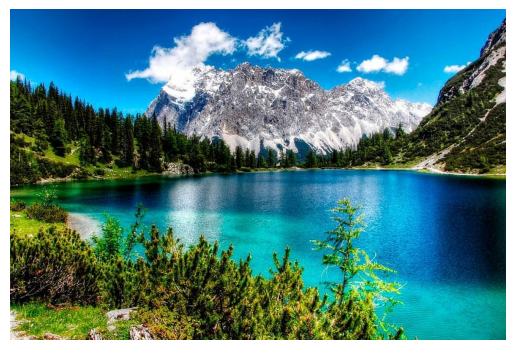

In [ ]:
get_colors(img_Red,img_Green,img_Blue,1,1,1)

In [ ]:
# Vamos a cargar las imágenes de la carpeta 2
img_Red = cv2.imread('imagen2_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE) # Tomando en cuenta que están a escala de grises, se coloca cv2.IMREAD_GRAYSCALE
img_Green = cv2.imread('imagen2_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
img_Blue = cv2.imread('imagen2_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)

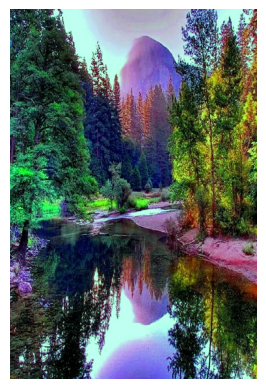

In [ ]:
# Ajustamos los colores necesarios
get_colors(img_Red,img_Green,img_Blue,0.75,1.25,0.95)

# **EJERCICIO 3**
Cree una funcón que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [ ]:
def create_grayscale_3d(image):
    color_image = cv2.imread(image)
    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    # Crear las imágenes en escala de grises en 3D
    R = color_image[:, :, 0]
    G = color_image[:, :, 1]
    B = color_image[:, :, 2]

    gray_image_r = R[:, :, np.newaxis]
    gray_image_g = G[:, :, np.newaxis]
    gray_image_b = B[:, :, np.newaxis]

    return gray_image_r, gray_image_g, gray_image_b, color_image


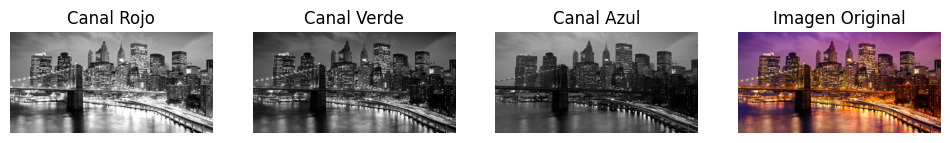

In [ ]:
gray_image_r, gray_image_g, gray_image_b, original = create_grayscale_3d('imagenColor.jpg') # Aqui obtenemos las 4 imágenes

# Mostrar las imágenes en escala de grises
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(gray_image_r[:, :, 0], cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(142)
plt.imshow(gray_image_g[:, :, 0], cmap='gray')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(143)
plt.imshow(gray_image_b[:, :, 0], cmap='gray')
plt.title('Canal Azul')
plt.axis('off')

plt.subplot(144)
plt.imshow(original)
plt.title('Imagen Original')
plt.axis('off')

plt.show()

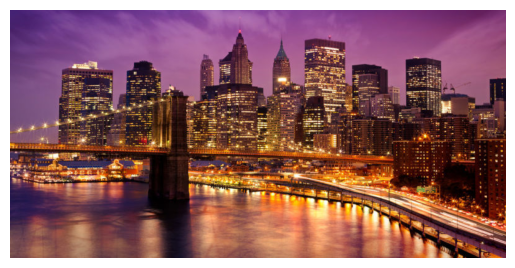

In [ ]:
# Probamos la función del ejercicio anterior para devolver el color
get_colors(gray_image_r,gray_image_g,gray_image_b,1,1,1)
plt.show()

# **PROBLEMA 4**
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media
de la distribucion.

In [ ]:
imagen_hist = cv2.imread('imagenColor.jpg')
imagen_hist = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

def calcular_histograma(imagen):
    # Obtenemos las dimensiones de la imagen
    altura, ancho, canales = imagen.shape

    # Comenzamos los histogramas
    histograma_r = np.zeros(256)
    histograma_g = np.zeros(256)
    histograma_b = np.zeros(256)
    histograma_gris = np.zeros(256)

    # Clacular los histogramas por color
    for y in range(altura):
        for x in range(ancho):
            pixel = imagen[y, x]
            r, g, b = pixel
            gris = int((r + g + b) / 3)  # Promedio aritmético
            histograma_r[r] += 1
            histograma_g[g] += 1
            histograma_b[b] += 1
            histograma_gris[gris] += 1

    # Media de la distribución
    media_r = np.sum(np.arange(256) * histograma_r) / np.sum(histograma_r)
    media_g = np.sum(np.arange(256) * histograma_g) / np.sum(histograma_g)
    media_b = np.sum(np.arange(256) * histograma_b) / np.sum(histograma_b)
    media_gris = np.sum(np.arange(256) * histograma_gris) / np.sum(histograma_gris)

    # Histogramas y linea vertical
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.bar(np.arange(256), histograma_r, color='red', alpha=0.7)
    plt.axvline(media_r, color='black', linestyle='dashed', linewidth=2)
    plt.title('Histograma Canal Rojo')
    plt.subplot(2, 2, 2)
    plt.bar(np.arange(256), histograma_g, color='green', alpha=0.7)
    plt.axvline(media_g, color='black', linestyle='dashed', linewidth=2)
    plt.title('Histograma Canal Verde')
    plt.subplot(2, 2, 3)
    plt.bar(np.arange(256), histograma_b, color='blue', alpha=0.7)
    plt.axvline(media_b, color='black', linestyle='dashed', linewidth=2)
    plt.title('Histograma Canal Azul')
    plt.subplot(2, 2, 4)
    plt.bar(np.arange(256), histograma_gris, color='gray', alpha=0.7)
    plt.axvline(media_gris, color='black', linestyle='dashed', linewidth=2)
    plt.title('Histograma Escala de Grises')

    plt.tight_layout()
    plt.show()




<ipython-input-197-e3c9a6d64721>:19: RuntimeWarning: overflow encountered in ubyte_scalars
  gris = int((r + g + b) / 3)  # Promedio aritmético para la escala de grises


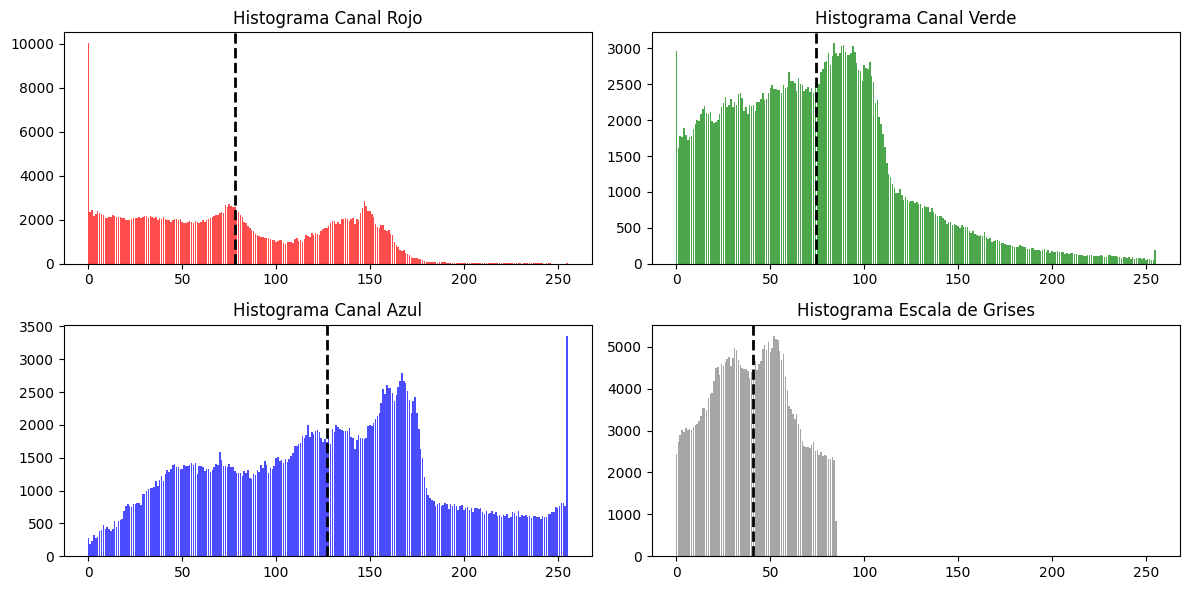

In [ ]:
calcular_histograma(imagen_hist)

# **EJERCICIO 5**

** Espacio de color HSV**
El espacio de color HSV (Matiz, Saturación, Valor) es un modelo de color que se utiliza para describir y representar colores en términos de sus atributos perceptuales. A diferencia del espacio de color RGB (Rojo, Verde, Azul), que se basa en la combinación de luces roja, verde y azul, el espacio de color HSV se enfoca en la forma en que los humanos perciben y categorizan los colores.

Los componentes del espacio de color HSV son:

**Matiz (H):** Representa el tono o tipo de color. Se mide en grados, y los valores van desde 0° a 360°. En este espacio, los colores se organizan en un círculo cromático, donde los colores puros (rojo, verde, azul, etc.) se encuentran en los extremos y los colores intermedios se ubican en puntos intermedios del círculo.

**Saturación (S):** Representa la intensidad del color. Se mide en porcentaje y varía desde 0% (gris) hasta 100% (color puro). Una saturación del 100% significa un color completamente intenso, mientras que una saturación del 0% resulta en un tono de gris sin color.

**Valor (V):** Representa el brillo o luminosidad del color. También se mide en porcentaje y varía desde 0% (negro) hasta 100% (blanco). Un valor alto indica un color claro, mientras que un valor bajo indica un color oscuro.

Para mapear colores del espacio de color RGB al espacio de color HSV, se utilizan fórmulas matemáticas que transforman las componentes de un modelo a las del otro. Este proceso implica calcular el matiz, la saturación y el valor a partir de los valores de rojo (R), verde (G) y azul (B) de cada píxel en el espacio RGB.

Una vez que los colores están representados en el espacio de color HSV, se pueden realizar diversas operaciones, como ajustes de brillo, cambios de saturación, etc. Además, el espacio de color HSV es especialmente útil para aplicaciones de procesamiento de imágenes y visión por computadora, ya que permite manipular colores de manera más intuitiva y controlada.